In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Reading and Preprocessing

In [3]:
dataset = pd.read_csv('../HW1_data/mobile-price-classification/train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [4]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
X = dataset.drop('price_range',axis=1)
y = dataset['price_range']

In [6]:
# Normalize all features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6357)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=6357)
X_mean = X_train.mean()
X_max = X_train.max()
X_min = X_train.min()
normalize = lambda raw: (raw - X_mean) / (X_max - X_min)
denormalize = lambda raw: raw * (X_max - X_min) + X_mean
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1280.000000,1.280000e+03,1.280000e+03
mean,-6.071532e-17,-1.942890e-17,-4.579670e-17,-3.469447e-19,2.220446e-17,-2.844947e-17,-2.151057e-17,-2.959438e-16,-4.787837e-17,-6.245005e-17,3.400058e-17,2.775558e-18,6.366435e-17,-2.081668e-18,2.723516e-17,6.245005e-18,4.163336e-18,0.000000,-1.387779e-18,3.608225e-17
std,2.909140e-01,5.000391e-01,3.310058e-01,5.001930e-01,2.281365e-01,4.998436e-01,2.928132e-01,3.190474e-01,2.943054e-01,3.266592e-01,3.034750e-01,2.280919e-01,2.834295e-01,2.920722e-01,3.033134e-01,2.434320e-01,3.032835e-01,0.426199,4.999976e-01,4.997825e-01
min,-4.919640e-01,-4.875000e-01,-4.138125e-01,-5.015625e-01,-2.244243e-01,-5.187500e-01,-4.770413e-01,-4.467014e-01,-5.055469e-01,-4.968750e-01,-4.918359e-01,-3.256558e-01,-4.980537e-01,-4.925964e-01,-5.252790e-01,-3.180990e-01,-5.010851e-01,-0.761719,-5.140625e-01,-5.203125e-01
25%,-2.483143e-01,-4.875000e-01,-3.338125e-01,-5.015625e-01,-1.717928e-01,-5.187500e-01,-2.673639e-01,-3.355903e-01,-2.555469e-01,-2.111607e-01,-2.918359e-01,-1.866101e-01,-2.440483e-01,-2.533059e-01,-2.395647e-01,-2.069878e-01,-2.788628e-01,0.238281,-5.140625e-01,-5.203125e-01
50%,-8.675217e-03,-4.875000e-01,-1.381250e-02,4.984375e-01,-6.652961e-02,4.812500e-01,-9.299395e-03,-2.256944e-03,1.111979e-02,-6.830357e-02,8.164063e-03,-3.627662e-02,-1.057660e-03,-2.101113e-03,4.614955e-02,-4.032118e-02,-1.085069e-03,0.238281,4.859375e-01,4.796875e-01
75%,2.475079e-01,5.125000e-01,3.061875e-01,4.984375e-01,1.439967e-01,4.812500e-01,2.487651e-01,2.477431e-01,2.527865e-01,2.174107e-01,2.581641e-01,1.489466e-01,2.449370e-01,2.502416e-01,2.604353e-01,1.819010e-01,2.766927e-01,0.238281,4.859375e-01,4.796875e-01
max,5.080360e-01,5.125000e-01,5.861875e-01,4.984375e-01,7.755757e-01,4.812500e-01,5.229587e-01,5.532986e-01,4.944531e-01,5.031250e-01,5.081641e-01,6.743442e-01,5.019463e-01,5.074036e-01,4.747210e-01,6.819010e-01,4.989149e-01,0.238281,4.859375e-01,4.796875e-01


# Decision Tree

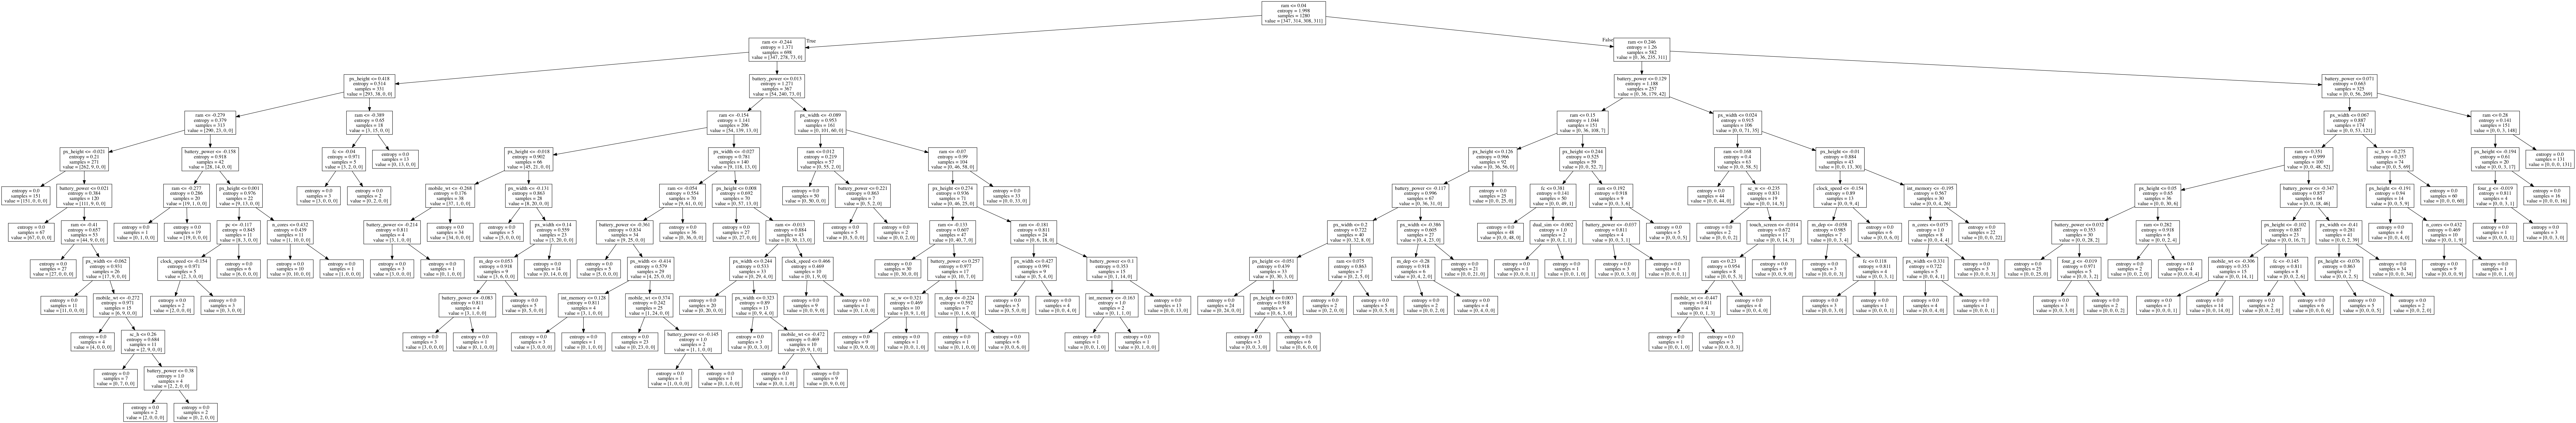

In [7]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus as pydot
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn import tree

# Vanilla Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", random_state=4321)
dt.fit(X_train, y_train)

# Visualize
def visualize_dt(dt):
    feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
    dot_data = StringIO()
    tree.export_graphviz(dt, out_file=dot_data,feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())
   
visualize_dt(dt)

In [8]:
# Post-prune Decision Tree 
# My own implementation based on https://stackoverflow.com/questions/49428469/pruning-decision-trees/49496027#49496027
# Pruning based on validation score (if pruning a subtree gains better performance on validate set, then prune it)
from sklearn.tree._tree import TREE_LEAF

def prune_from_root(inner_tree, index):
    global dt_val_score
    memo = (inner_tree.children_left[index], inner_tree.children_right[index])
    inner_tree.children_left[index] = TREE_LEAF
    inner_tree.children_right[index] = TREE_LEAF
    new_score = dt.score(X_val, y_val)
    if new_score <= dt_val_score:
        inner_tree.children_left[index] = memo[0]
        inner_tree.children_right[index] = memo[1]
    else:
        dt_val_score = new_score

    # if there are children, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_from_root(inner_tree, inner_tree.children_left[index])
        prune_from_root(inner_tree, inner_tree.children_right[index])

def prune_from_leaf(inner_tree, index):
    global dt_val_score
    # if there are children, firstly visit them
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_from_leaf(inner_tree, inner_tree.children_left[index])
        prune_from_leaf(inner_tree, inner_tree.children_right[index])
        memo = (inner_tree.children_left[index], inner_tree.children_right[index])
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
        new_score = dt.score(X_val, y_val)
        if new_score <= dt_val_score:
            inner_tree.children_left[index] = memo[0]
            inner_tree.children_right[index] = memo[1]
        else:
            dt_val_score = new_score

no-prune validation score:  0.8375
no-prune test score:  0.835
post-prune from root validation score:  0.865625
post-prune from root test score:  0.8225


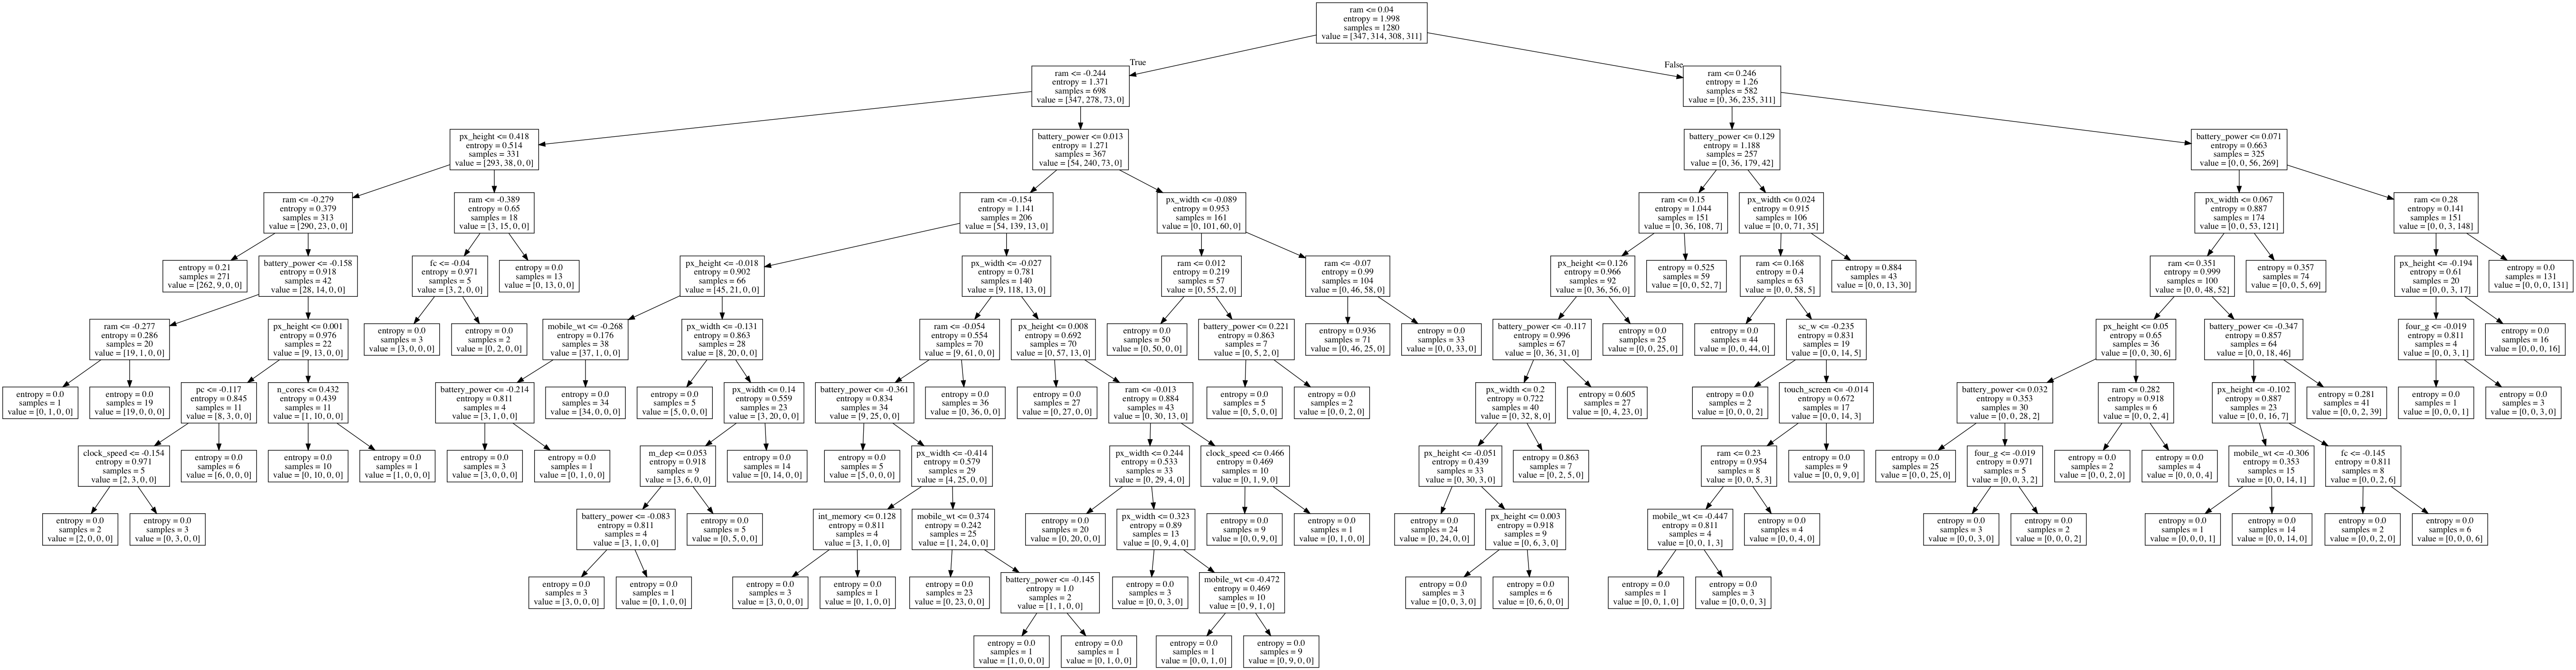

In [9]:
# prune from root
dt = DecisionTreeClassifier(criterion="entropy", random_state=4321)
dt.fit(X_train, y_train)
dt_val_score = dt.score(X_val, y_val)
print("no-prune validation score: ", dt_val_score)
print("no-prune test score: ", dt.score(X_test, y_test))
prune_from_root(dt.tree_, 0)
print("post-prune from root validation score: ", dt.score(X_val, y_val))
print("post-prune from root test score: ", dt.score(X_test, y_test))
visualize_dt(dt)

no-prune validation score:  0.8375
no-prune test score:  0.835
post-prune from leaf validation score:  0.865625
post-prune from leaf test score:  0.8375


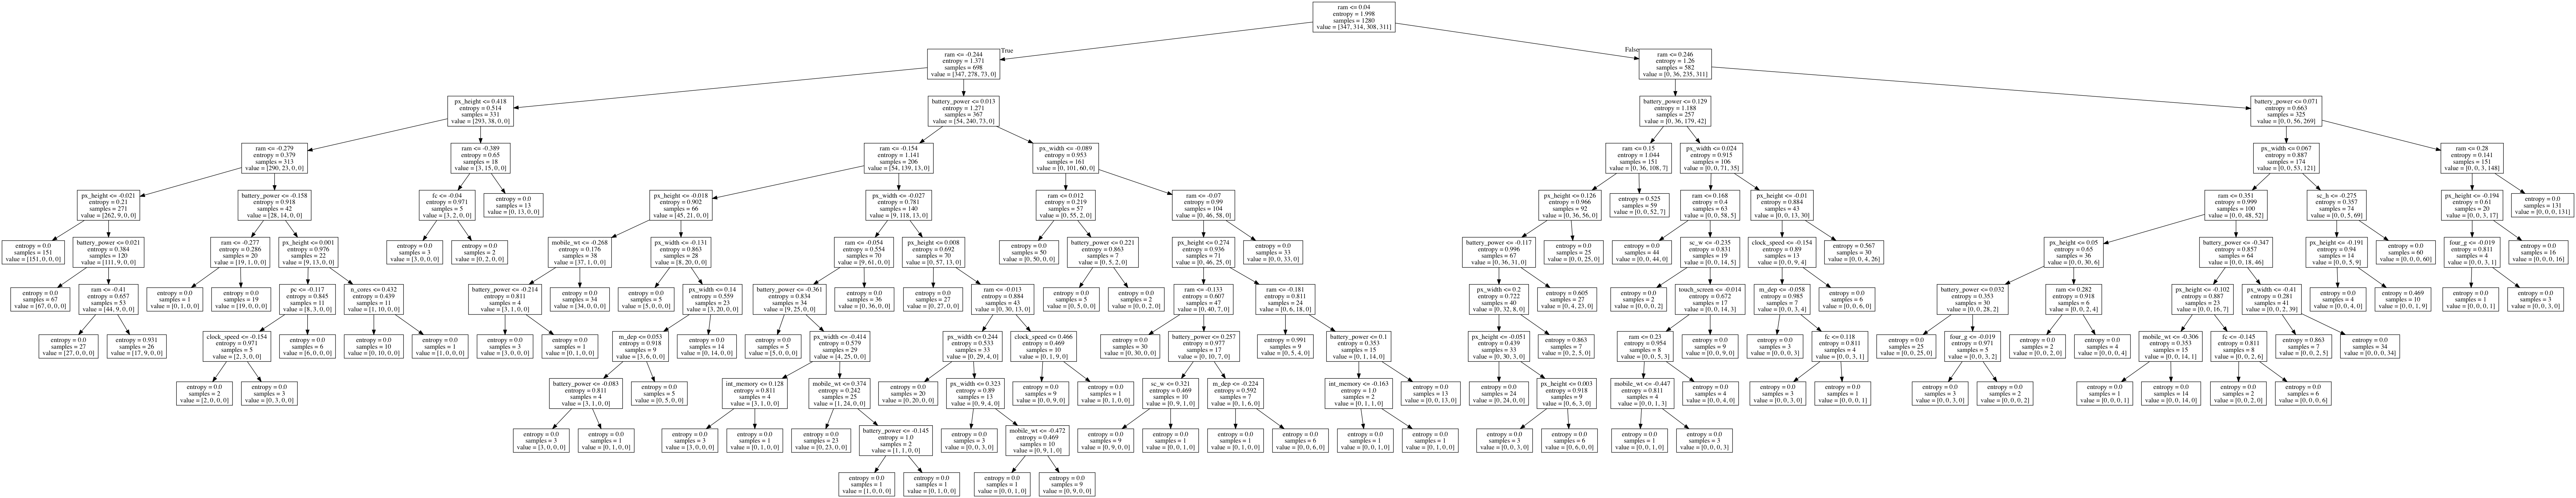

In [10]:
# prune from leaf
# create an identical decision tree to the previous one using the same random_state
dt = DecisionTreeClassifier(criterion="entropy", random_state=4321)
dt.fit(X_train, y_train)
dt_val_score = dt.score(X_val, y_val)
print("no-prune validation score: ", dt_val_score)
print("no-prune test score: ", dt.score(X_test, y_test))
prune_from_leaf(dt.tree_, 0)
print("post-prune from leaf validation score: ", dt.score(X_val, y_val))
print("post-prune from leaf test score: ", dt.score(X_test, y_test))
visualize_dt(dt)

In [11]:
# pre prune + post prune
best_val = 0
best_val_depth = 0
best_post_prune = ""
for depth in range(1, 21):
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=4321)
    dt.fit(X_train, y_train)
    dt_val_score = dt.score(X_val, y_val)
    print("===================", "depth=%d, post-prune=from root" % depth, sep='\n')
    print("no-prune validation score: ", dt_val_score)
    print("no-prune test score: ", dt.score(X_test, y_test))
    prune_from_root(dt.tree_, 0)
    val_score = dt.score(X_val, y_val)
    print("post-prune from root validation score: ", val_score)
    if val_score > best_val:
        best_val = val_score
        best_val_depth = depth
        best_post_prune = "from root"
    print("post-prune from root test score: ", dt.score(X_test, y_test))
    
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=4321)
    dt.fit(X_train, y_train)
    dt_val_score = dt.score(X_val, y_val)
    print("===================", "depth=%d, post-prune=from leaf" % depth, sep='\n')
    print("no-prune validation score: ", dt_val_score)
    print("no-prune test score: ", dt.score(X_test, y_test))
    prune_from_leaf(dt.tree_, 0)
    val_score = dt.score(X_val, y_val)
    print("post-prune from leaf validation score: ", val_score)
    if val_score >= best_val:
        best_val = val_score
        best_val_depth = depth
        best_post_prune = "from leaf"
    print("post-prune from leaf test score: ", dt.score(X_test, y_test))
print("*********************")
print("best_val=%f, best_val_depth=%d, best_post_prune=%s" % (best_val, best_val_depth, best_post_prune))

depth=1, post-prune=from root
no-prune validation score:  0.484375
no-prune test score:  0.4675
post-prune from root validation score:  0.484375
post-prune from root test score:  0.4675
depth=1, post-prune=from leaf
no-prune validation score:  0.484375
no-prune test score:  0.4675
post-prune from leaf validation score:  0.484375
post-prune from leaf test score:  0.4675
depth=2, post-prune=from root
no-prune validation score:  0.7375
no-prune test score:  0.765
post-prune from root validation score:  0.7375
post-prune from root test score:  0.765
depth=2, post-prune=from leaf
no-prune validation score:  0.7375
no-prune test score:  0.765
post-prune from leaf validation score:  0.7375
post-prune from leaf test score:  0.765
depth=3, post-prune=from root
no-prune validation score:  0.740625
no-prune test score:  0.7725
post-prune from root validation score:  0.740625
post-prune from root test score:  0.7725
depth=3, post-prune=from leaf
no-prune validation score:  0.740625
no-prune test s

# Neural Networks

In [12]:
from sklearn.neural_network import MLPClassifier

best_val = 0
best_layer = (0)
best_activation = ""
for first_layer in range(50, 301, 100):
    for activation in ['identity', 'logistic', 'tanh', 'relu']:
        mlp = MLPClassifier(hidden_layer_sizes=(first_layer), activation=activation, max_iter=1000)
        mlp.fit(X_train, y_train)
        val_score = mlp.score(X_val, y_val)
        if val_score > best_val:
            best_val = val_score
            best_layer = (first_layer)
            best_activation = activation
    for second_layer in range(50, 301, 100):
        for activation in ['identity', 'logistic', 'tanh', 'relu']:
            mlp = MLPClassifier(hidden_layer_sizes=(first_layer, second_layer), activation=activation, max_iter=1000)
            mlp.fit(X_train, y_train)
            val_score = mlp.score(X_val, y_val)
            if val_score > best_val:
                best_val = val_score
                best_layer = (first_layer, second_layer)
                best_activation = activation

print(best_val)
print(best_layer)
print(best_activation)
mlp = MLPClassifier(hidden_layer_sizes=(best_layer), activation=best_activation, max_iter=1000)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

0.9625
(150, 50)
identity


0.97

# Boosting

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

best_val = 0
best_depth = 0
best_n_estimators = 0
for depth in range(1, 10):
    for n_estimators in [100, 200, 400, 1000, 2000]:
        ada_dt = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
        adaboost = AdaBoostClassifier(base_estimator=ada_dt, n_estimators=n_estimators)
        adaboost.fit(X_train,y_train)
        val_score = adaboost.score(X_val,y_val)
        if val_score > best_val:
            best_val = val_score
            best_depth = depth
            best_n_estimators = n_estimators
            
print("Best validation score: ", best_val)
print("Best depth: ", best_depth)
print("Best estimators: ", best_n_estimators)
ada_dt = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth)
adaboost = AdaBoostClassifier(base_estimator=ada_dt, n_estimators=best_n_estimators)
adaboost.fit(X_train,y_train)
test_score = adaboost.score(X_test, y_test)
print("Test score: ", test_score)

Best validation score:  0.909375
Best depth:  6
Best estimators:  2000
Test score:  0.9175


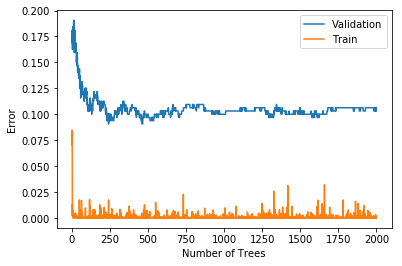

In [28]:
val_mid_error = []
for mid_predict in adaboost.staged_predict(X_val):
    val_mid_error.append(1 - accuracy_score(mid_predict, y_val))

number_of_predict = len(val_mid_error)
train_mid_error = adaboost.estimator_errors_[:number_of_predict]

plt.plot(range(1, number_of_predict + 1),
         val_mid_error, label='Validation')
plt.plot(range(1, number_of_predict + 1),
         train_mid_error, label='Train')
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.show()

# SVM

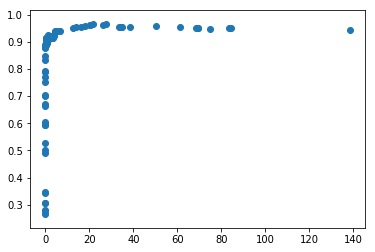

Best validation error:  0.965625
Best C:  27.74633808136442


In [33]:
from sklearn import svm
from random import random

best_val = 0
best_C = 0
all_C_val_score = []
all_C = []
for i in range(100):
    log_C = random() * 10 - 5
    C = np.exp(log_C)
    clf = svm.SVC(C=C, kernel="linear", decision_function_shape='ovr')
    clf.fit(X_train,y_train)
    val_score = clf.score(X_val,y_val)
    if val_score > best_val:
        best_val = val_score
        best_C = C
    all_C.append(C)
    all_C_val_score.append(val_score)

plt.scatter(all_C, all_C_val_score)
plt.show()
print("Best validation score: ", best_val)
print("Best C: ", best_C)

In [35]:
clf = svm.SVC(C=best_C, kernel="linear", decision_function_shape='ovr')
clf.fit(X_train, y_train)
print("Test score: ", clf.score(X_test, y_test))

Test score:  0.965


# KNN

In [53]:
denormalize = lambda raw: raw * (X_max - X_min) + X_mean
X_train = denormalize(X_train)
X_val = denormalize(X_val)
X_test = denormalize(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [61]:
knn.score(X_val, y_val)

0.928125

In [66]:
error_rate = []
for n in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=n, weights="distance", metric="euclidean")
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

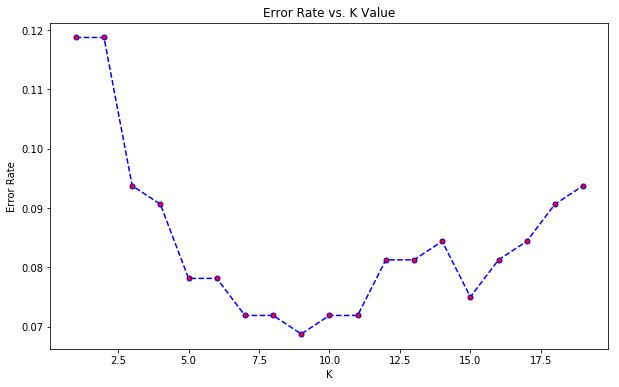

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [70]:
best_val = 0
best_n = 0
best_weights = ""
best_metric = ""
for n in range(1,20):
    for weights in ["uniform", "distance"]:
        for metric in ["euclidean", "manhattan", "chebyshev", "minkowski"]:
            knn = KNeighborsClassifier(n_neighbors=n, weights=weights, metric=metric)
            knn.fit(X_train,y_train)
            val_score = knn.score(X_val, y_val)
            print("n=%d, weights=%s, metric=%s, val_score=%f" % (n, weights, metric, val_score))
            if val_score > best_val:
                best_val = val_score
                best_n = n
                best_weights = weights
                best_metric = metric
print("Best validation score: ", best_val)
print("Best n: ", best_n)
print("Best weights method: ", best_weights)
print("Best distance metric: ", best_metric)

n=1, weights=uniform, metric=euclidean, val_score=0.881250
n=1, weights=uniform, metric=manhattan, val_score=0.878125
n=1, weights=uniform, metric=chebyshev, val_score=0.881250
n=1, weights=uniform, metric=minkowski, val_score=0.881250
n=1, weights=distance, metric=euclidean, val_score=0.881250
n=1, weights=distance, metric=manhattan, val_score=0.878125
n=1, weights=distance, metric=chebyshev, val_score=0.881250
n=1, weights=distance, metric=minkowski, val_score=0.881250
n=2, weights=uniform, metric=euclidean, val_score=0.875000
n=2, weights=uniform, metric=manhattan, val_score=0.878125
n=2, weights=uniform, metric=chebyshev, val_score=0.859375
n=2, weights=uniform, metric=minkowski, val_score=0.875000
n=2, weights=distance, metric=euclidean, val_score=0.881250
n=2, weights=distance, metric=manhattan, val_score=0.878125
n=2, weights=distance, metric=chebyshev, val_score=0.881250
n=2, weights=distance, metric=minkowski, val_score=0.881250
n=3, weights=uniform, metric=euclidean, val_scor

n=18, weights=distance, metric=chebyshev, val_score=0.912500
n=18, weights=distance, metric=minkowski, val_score=0.909375
n=19, weights=uniform, metric=euclidean, val_score=0.900000
n=19, weights=uniform, metric=manhattan, val_score=0.900000
n=19, weights=uniform, metric=chebyshev, val_score=0.909375
n=19, weights=uniform, metric=minkowski, val_score=0.900000
n=19, weights=distance, metric=euclidean, val_score=0.906250
n=19, weights=distance, metric=manhattan, val_score=0.915625
n=19, weights=distance, metric=chebyshev, val_score=0.918750
n=19, weights=distance, metric=minkowski, val_score=0.906250
Best validation score:  0.93125
Best n:  9
Best weights method:  distance
Best distance metric:  euclidean


In [71]:
knn = KNeighborsClassifier(n_neighbors=best_n, weights=best_weights, metric=best_metric)
knn.fit(X_train,y_train)
print("Test score: ", knn.score(X_test, y_test))

Test score:  0.9075
